# Portada

INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

ANÁLISIS SOCIOFORMADOR

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESOR:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
21 - 10 - 2024

# Librerías y lectura de datos

In [573]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [574]:
# Lectura de los datos

P8_v3 = pd.read_csv("P08_v03.csv")
P8_v5 = pd.read_csv("P08_v05.csv")
P8_v7 = pd.read_csv("P08_v07.csv")
P8_v9 = pd.read_csv("P08_v09.csv")
P8_v11 = pd.read_csv("P08_v11.csv")

### Distribución de datos y valores nulos

In [575]:
# Compruebo que hay la misma cantidad (distribución) de instancias por cada ventaneo capturado para el paciente 08:

P8_v3[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v5[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v7[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v9[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v11[['01_C', '02_A', '03_D', '04_M']].value_counts()

01_C  02_A  03_D  04_M
-1     1    -1    -1      2888
      -1    -1     1      1433
 1    -1    -1    -1       435
-1     1     1    -1       143
 1     1    -1    -1        15
      -1    -1     1         4
-1     1    -1     1         2
      -1    -1    -1         2
Name: count, dtype: int64

In [576]:
# No tenemos valores nulos así que no habrá tratado:

print(P8_v3.isnull().sum().sum()) 
print(P8_v5.isnull().sum().sum()) 
print(P8_v7.isnull().sum().sum()) 
print(P8_v9.isnull().sum().sum()) 
print(P8_v11.isnull().sum().sum())

0
0
0
0
0


In [577]:
# Añadimos la columna de los ventaneos

P8_v3["TimeWindow"] = "v3"
P8_v5["TimeWindow"] = "v5"
P8_v7["TimeWindow"] = "v7"
P8_v9["TimeWindow"] = "v9"
P8_v11["TimeWindow"] = "v11"

### Concatenado de frames

In [578]:
# Concatenar los DataFrames
df = pd.concat([P8_v3, P8_v5, P8_v7, P8_v9, P8_v11], axis=0)
df["User"] = "p08"
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.581437,0.370486,0.445622,0.383397,-1,1,-1,-1,v3,p08
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.626605,0.370919,0.453539,0.388081,-1,1,-1,-1,v3,p08
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.623786,0.424305,0.411762,0.409344,-1,1,-1,-1,v3,p08
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.562665,0.518454,0.400485,0.495307,-1,1,-1,-1,v3,p08
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.529153,0.513277,0.471414,0.521704,-1,1,-1,-1,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.327026,0.462272,0.459193,0.593817,1,-1,-1,-1,v11,p08
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.339617,0.451013,0.469690,0.608083,1,-1,-1,-1,v11,p08
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.335625,0.451241,0.470742,0.599183,1,-1,-1,-1,v11,p08
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.357564,0.424743,0.478960,0.597855,1,-1,-1,-1,v11,p08


In [579]:
# Comprobamos los ventaneos y la columna final añadida
df["User"].value_counts()
df["TimeWindow"].value_counts()

TimeWindow
v3     4922
v5     4922
v7     4922
v9     4922
v11    4922
Name: count, dtype: int64

In [580]:
# Instancia por clase:

print("Variable Objetivo 'Cansancio':" )
print(df["01_C"].value_counts().sort_values(ascending = True))
print("Variable Objetivo 'Cansancio' %:" )
print(df['01_C'].value_counts(normalize=True)) 
print("Variable Objetivo 'Ansiedad':" )
print(df["02_A"].value_counts().sort_values(ascending = False))
print("Variable Objetivo 'Ansiedad' %:" )
print(df['02_A'].value_counts(normalize=True)) 
print("Variable Objetivo 'Dolor':" )
print(df["03_D"].value_counts().sort_values())
print("Variable Objetivo 'Dolor': %" )
print(df['03_D'].value_counts(normalize=True)) 
print("Variable Objetivo 'Motivación':" )
print(df["04_M"].value_counts().sort_values())
print("Variable Objetivo 'Motivación': %" )
print(df['04_M'].value_counts(normalize=True))

Variable Objetivo 'Cansancio':
01_C
 1     2270
-1    22340
Name: count, dtype: int64
Variable Objetivo 'Cansancio' %:
01_C
-1    0.907761
 1    0.092239
Name: proportion, dtype: float64
Variable Objetivo 'Ansiedad':
02_A
 1    15228
-1     9382
Name: count, dtype: int64
Variable Objetivo 'Ansiedad' %:
02_A
 1    0.618773
-1    0.381227
Name: proportion, dtype: float64
Variable Objetivo 'Dolor':
03_D
 1      715
-1    23895
Name: count, dtype: int64
Variable Objetivo 'Dolor': %
03_D
-1    0.970947
 1    0.029053
Name: proportion, dtype: float64
Variable Objetivo 'Motivación':
04_M
 1     7195
-1    17415
Name: count, dtype: int64
Variable Objetivo 'Motivación': %
04_M
-1    0.707639
 1    0.292361
Name: proportion, dtype: float64


In [581]:
# Vemos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24610 entries, 0 to 4921
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Veloc       24610 non-null  float64
 1   Acele       24610 non-null  float64
 2   Des_x       24610 non-null  float64
 3   Des_y       24610 non-null  float64
 4   Des_z       24610 non-null  float64
 5   Presn       24610 non-null  float64
 6   VelPr       24610 non-null  float64
 7   AcePr       24610 non-null  float64
 8   F5EEX       24610 non-null  float64
 9   F6EES       24610 non-null  float64
 10  F8EIX       24610 non-null  float64
 11  F7EIS       24610 non-null  float64
 12  F9EEX       24610 non-null  float64
 13  F10ES       24610 non-null  float64
 14  F11EX       24610 non-null  float64
 15  F12ES       24610 non-null  float64
 16  F13EV       24610 non-null  float64
 17  F14EV       24610 non-null  float64
 18  F17MS       24610 non-null  float64
 19  F18MX       24610 non-null  flo

# Mapeo de columnas y limpieza inicial

Conjunto de datos:
Cinco archivos CSV divididos en los ventaneos de tiempo, todas las variables son numéricas en los datasets y con las mismas dimensiones, en estas bases de datos se tienen diferentes datos divididos de la siguiente manera:

- Velocidad (Columna 0): Columna destinada a medir la velocidad con la que se usa el aparato.
- Aceleración (Columna 1): Columna destinada a medir la aceleración con la que se usa el aparato.
- Des_x (Columna 2): Desplazamiento en la coordenada x
- Des_y (Columna 3): Desplazamiento en la coordenada y
- Des_z (Columna 4): Desplazamiento en la coordenada z
- Presn (Columna 5): Columna relacionada con la presión 
- VelPr (Columna 6): Columna relacionada con la presión
- AcePr (Columna 7): Columna relacionada con la presión
- F (Columnas 8 a 27): Columnas marcadas como los puntos del rostro del paciente (Más información en el artículo que se adjuntó con la base de datos)
- 01_C (Columna 28): Variable Objetivo Cansancio
- 02_A (Columna 29): Variable Objetivo Ansiedad
- 03_D (Columna 30): Variable Objetivo Dolor
- 04_M (Columna 31): Variable Objetivo Motivación


Columnas iniciales creadas (Etiquetas):

- TimeWindow: Los ventaneos de cada base de datos
- User: El paciente

Paciente Seleccionado: Paciente 08

Fecha de obtención de los datos:
09 - 10 - 2024

Conjuntos obtenidos a través de la máquina de apoyo para pacientes con accidentes cerebro vasculares (CVA) y con discapacidad de movimiento donde se realizan actividades con el sistema Gesture Therapy (GT), ambiente virtual para que los pacientes hagan sesiones con diferentes juegos o actividades, el juego mapeado llamado "Avispa". La máquina posee un aparato sensor de presión, gripper y cámara.

Este proyecto tiene por objetivo aplicar lo aprendido durante esta concentración de análitica y herramientas de Inteligencia Artificial impartida por la profesora Candy Yuridiana Alemán Muñoz, Juan Manuel Ahuactzin Larios, Rigoberto Cerino Jiménez y Alfredo García Suárez, principal enfásis en la experimentación de modelos supervisados basados en estadística así como la aplicación de un dashboard en lenguaje de programación Python.

In [582]:
# Número de instancias totales

print(f"El data frame compilado del paciente 08 tiene las siguientes dimensiones: \n {df.shape[0]} Filas \n {df.shape[1]} Columnas")

El data frame compilado del paciente 08 tiene las siguientes dimensiones: 
 24610 Filas 
 34 Columnas


In [583]:
# Instancia por clase:

print("Variable Objetivo 'Cansancio':" )
print(df["01_C"].value_counts()) 
print("Variable Objetivo 'Ansiedad':" )
print(df["02_A"].value_counts())
print("Variable Objetivo 'Dolor':" )
print(df["03_D"].value_counts())
print("Variable Objetivo 'Motivación':" )
print(df["04_M"].value_counts())

Variable Objetivo 'Cansancio':
01_C
-1    22340
 1     2270
Name: count, dtype: int64
Variable Objetivo 'Ansiedad':
02_A
 1    15228
-1     9382
Name: count, dtype: int64
Variable Objetivo 'Dolor':
03_D
-1    23895
 1      715
Name: count, dtype: int64
Variable Objetivo 'Motivación':
04_M
-1    17415
 1     7195
Name: count, dtype: int64


In [584]:
# Instancias que reportan más de una emoción:

df[(df[['01_C', '02_A', '03_D', '04_M']] == 1).sum(axis=1) >= 2]

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
270,0.078784,0.011910,0.059877,0.080516,0.015276,0.425287,0.437500,0.111111,0.384390,0.376984,...,0.571491,0.684126,0.484869,0.768331,1,1,-1,-1,v3,p08
288,0.085241,0.105911,0.007457,0.177548,0.036395,0.264368,0.125000,0.000000,0.356855,0.318095,...,0.401828,0.610454,0.393709,0.486353,1,1,-1,-1,v3,p08
354,0.142945,0.157479,0.097903,0.213262,0.043923,0.402299,0.062500,0.111111,0.313996,0.254711,...,0.744244,0.461353,0.283556,0.421381,-1,1,1,-1,v3,p08
355,0.040839,0.011540,0.032453,0.036394,0.052409,0.379310,0.125000,0.000000,0.318205,0.217635,...,0.648436,0.491062,0.257130,0.410091,-1,1,1,-1,v3,p08
356,0.052830,0.005599,0.060841,0.019043,0.017671,0.356322,0.062500,0.111111,0.260672,0.137317,...,0.583336,0.515032,0.211255,0.339691,-1,1,1,-1,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0.219840,0.225870,0.504518,0.205583,0.080871,0.590909,0.281991,0.210386,0.428788,0.356770,...,0.303083,0.374909,0.428067,0.370855,1,-1,-1,1,v11,p08
4235,0.489103,0.429406,0.829321,0.418768,0.286348,0.431818,0.206411,0.191127,0.367263,0.343874,...,0.329715,0.331504,0.501770,0.370167,1,-1,-1,1,v11,p08
4578,0.076578,0.093488,0.055197,0.131037,0.026792,0.504132,0.527625,0.422234,0.463416,0.499395,...,0.495160,0.267697,0.442107,0.423586,1,1,-1,-1,v11,p08
4592,0.146919,0.155824,0.375769,0.124906,0.020488,0.537190,0.263096,0.306680,0.395765,0.324482,...,0.300382,0.434468,0.573484,0.555169,1,1,-1,-1,v11,p08


In [585]:
# Instancias que no reportaron alguna emoción (Al ser 10 filas, se eliminarán del análisis):

df[(df["01_C"] == -1) & (df["02_A"] == -1) & (df["03_D"] == -1) & (df["04_M"] == -1)]

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
2962,0.187215,0.116591,0.237455,0.184453,0.059185,0.652482,0.160000,0.125000,0.564514,0.398146,...,0.386769,0.576027,0.403027,0.431355,-1,-1,-1,-1,v3,p08
3652,0.034589,0.025905,0.039655,0.043919,0.035813,0.141844,0.080000,0.000000,0.476728,0.357497,...,0.418433,0.456661,0.333004,0.296849,-1,-1,-1,-1,v3,p08
2962,0.317944,0.136303,0.615017,0.219779,0.102792,0.617021,0.244444,0.225806,0.579101,0.405055,...,0.402431,0.576599,0.394348,0.451068,-1,-1,-1,-1,v5,p08
3652,0.074437,0.056875,0.049155,0.066086,0.118550,0.157447,0.111111,0.032258,0.450917,0.296017,...,0.417201,0.455368,0.314670,0.270567,-1,-1,-1,-1,v5,p08
2962,0.363830,0.225144,0.544567,0.251853,0.145280,0.592705,0.264151,0.244444,0.554224,0.393806,...,0.399216,0.574096,0.391314,0.407374,-1,-1,-1,-1,v7,p08
3652,0.108454,0.047235,0.047875,0.100547,0.141467,0.206687,0.358491,0.311111,0.408426,0.288898,...,0.421298,0.449918,0.308898,0.259674,-1,-1,-1,-1,v7,p08
2962,0.390987,0.230748,0.565366,0.240985,0.169792,0.574468,0.250000,0.230769,0.537368,0.399607,...,0.388080,0.562838,0.383741,0.371098,-1,-1,-1,-1,v9,p08
3652,0.133237,0.047070,0.056028,0.120707,0.155419,0.243499,0.359375,0.461538,0.393462,0.286412,...,0.429048,0.438591,0.316330,0.257119,-1,-1,-1,-1,v9,p08
2962,0.457832,0.313222,0.577332,0.319032,0.197076,0.564797,0.242857,0.220339,0.525596,0.387126,...,0.389945,0.552525,0.373338,0.351001,-1,-1,-1,-1,v11,p08
3652,0.153990,0.045786,0.062210,0.155566,0.168406,0.266925,0.328571,0.474576,0.389207,0.283692,...,0.412325,0.447648,0.322546,0.258859,-1,-1,-1,-1,v11,p08


In [586]:
# Colocamos el filtro
noEmocion = (df["01_C"] == -1) & (df["02_A"] == -1) & (df["03_D"] == -1) & (df["04_M"] == -1)
# Aplicar el filtro y eliminar las filas que no tienen emoción
df = df[~noEmocion]
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.581437,0.370486,0.445622,0.383397,-1,1,-1,-1,v3,p08
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.626605,0.370919,0.453539,0.388081,-1,1,-1,-1,v3,p08
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.623786,0.424305,0.411762,0.409344,-1,1,-1,-1,v3,p08
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.562665,0.518454,0.400485,0.495307,-1,1,-1,-1,v3,p08
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.529153,0.513277,0.471414,0.521704,-1,1,-1,-1,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.327026,0.462272,0.459193,0.593817,1,-1,-1,-1,v11,p08
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.339617,0.451013,0.469690,0.608083,1,-1,-1,-1,v11,p08
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.335625,0.451241,0.470742,0.599183,1,-1,-1,-1,v11,p08
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.357564,0.424743,0.478960,0.597855,1,-1,-1,-1,v11,p08


# Preprocesamiento de valores atípicos

In [587]:
# Separamos los valores cuantitativos y cualitativos

cuantitativos = df.drop(columns=["TimeWindow","User", "01_C", "02_A", "03_D", "04_M"])
cuantitativos

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.393835,0.411305,0.414019,0.575538,0.478212,0.483060,0.581437,0.370486,0.445622,0.383397
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.388726,0.391852,0.421974,0.571042,0.486375,0.431814,0.626605,0.370919,0.453539,0.388081
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.440334,0.385718,0.491756,0.583939,0.514783,0.432184,0.623786,0.424305,0.411762,0.409344
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.483042,0.404915,0.530646,0.600890,0.535958,0.560528,0.562665,0.518454,0.400485,0.495307
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.512528,0.424437,0.519248,0.620062,0.543140,0.600766,0.529153,0.513277,0.471414,0.521704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.425895,0.622687,0.445085,0.705328,0.595306,0.432989,0.327026,0.462272,0.459193,0.593817
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.432081,0.629916,0.459678,0.702665,0.606214,0.432269,0.339617,0.451013,0.469690,0.608083
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.423913,0.622235,0.455607,0.688715,0.595064,0.427624,0.335625,0.451241,0.470742,0.599183
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.424811,0.622909,0.462204,0.689341,0.598788,0.426189,0.357564,0.424743,0.478960,0.597855


In [588]:
# Obtenemos los cualitativos y las clases (No estarán en el preprocesamiento)
cualitativos = df[["TimeWindow","User", "01_C", "02_A", "03_D", "04_M"]]
cualitativos

,TimeWindow,User,01_C,02_A,03_D,04_M
0,v3,p08,-1,1,-1,-1
1,v3,p08,-1,1,-1,-1
2,v3,p08,-1,1,-1,-1
3,v3,p08,-1,1,-1,-1
4,v3,p08,-1,1,-1,-1
...,...,...,...,...,...,...
4917,v11,p08,1,-1,-1,-1
4918,v11,p08,1,-1,-1,-1
4919,v11,p08,1,-1,-1,-1
4920,v11,p08,1,-1,-1,-1


<Figure size 1500x800 with 0 Axes>

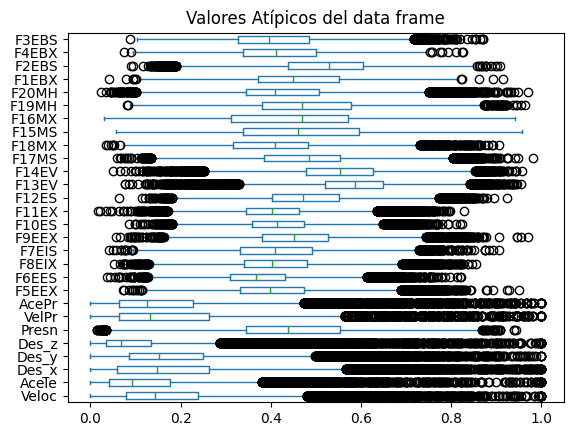

In [589]:
# Todos los valores son cuantitativos, no se separa la base
# Realizamos diagrama de caja de cada columna cuantitativa del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
cuantitativos.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del data frame")
plt.show() #Se muestra el diagrama

## Eliminación de Outliers usando el rango Intercuartilico (Método de Outliers elegido)

In [590]:
# Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativos
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

LimiteSuperiorIqr = percentile75 + 1.5*iqr
LimiteInferiorIqr = percentile25 + 1.5*iqr

print("Límite superior permitido:\n\n", LimiteSuperiorIqr)
print("Límite inferior permitido:\n\n", LimiteInferiorIqr)

Límite superior permitido:

 Veloc    0.479294
Acele    0.380332
Des_x    0.566734
Des_y    0.498791
Des_z    0.286508
Presn    0.863748
VelPr    0.563989
AcePr    0.474432
F5EEX    0.689368
F6EES    0.612845
F8EIX    0.690879
F7EIS    0.729122
F9EEX    0.743694
F10ES    0.649746
F11EX    0.635426
F12ES    0.773506
F13EV    0.841291
F14EV    0.852637
F17MS    0.803115
F18MX    0.730838
F15MS    0.981865
F16MX    0.960163
F19MH    0.872433
F20MH    0.749619
F1EBX    0.821900
F2EBS    0.850786
F4EBX    0.744307
F3EBS    0.717077
dtype: float64
Límite inferior permitido:

 Veloc    0.319496
Acele    0.245049
Des_x    0.363895
Des_y    0.333236
Des_z    0.185781
Presn    0.656710
VelPr    0.363393
AcePr    0.309659
F5EEX    0.546203
F6EES    0.491386
F8EIX    0.550878
F7EIS    0.570506
F9EEX    0.598803
F10ES    0.532844
F11EX    0.519544
F12ES    0.625590
F13EV    0.713272
F14EV    0.702771
F17MS    0.636194
F18MX    0.565415
F15MS    0.724578
F16MX    0.700874
F19MH    0.676012
F20MH    

In [591]:
# Obtener los valores limpios del dataframe
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNullIqr = cuantitativos[(y <= LimiteSuperiorIqr) & (y >= LimiteInferiorIqr)]
OutliersNullIqr

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.600766,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,NaN,NaN,0.534149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.622687,NaN,0.705328,NaN,NaN,NaN,NaN,NaN,0.593817
4918,NaN,NaN,0.538774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.629916,NaN,0.702665,NaN,NaN,NaN,NaN,NaN,0.608083
4919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.622235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599183
4920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.622909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597855


In [592]:
# Contar los outliers
OutliersNullIqr.isnull().sum()

Veloc    22405
Acele    22224
Des_x    22278
Des_y    22391
Des_z    22628
Presn    23533
VelPr    22084
AcePr    22301
F5EEX    22594
F6EES    22398
F8EIX    21993
F7EIS    22372
F9EEX    22330
F10ES    22084
F11EX    22564
F12ES    22115
F13EV    22800
F14EV    23212
F17MS    23083
F18MX    22359
F15MS    23613
F16MX    23367
F19MH    22806
F20MH    21824
F1EBX    23123
F2EBS    23032
F4EBX    22589
F3EBS    22037
dtype: int64

In [593]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizamos una copia del dataframe
dfClean = OutliersNullIqr.copy()
dfClean = dfClean.fillna(round(OutliersNullIqr.mean(),1))
dfClean

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.4,0.3,0.534149,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
4918,0.4,0.3,0.538774,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
4919,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
4920,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,0.5,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [594]:
# Corroboramos los valores nulos en el data clean
dfClean.isnull().sum().sum()

np.int64(0)

In [595]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers
Datos_sin_outliers = pd.concat([cualitativos, dfClean], axis=1)
Datos_sin_outliers

,TimeWindow,User,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,v11,p08,1,-1,-1,-1,0.4,0.3,0.534149,0.4,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
4918,v11,p08,1,-1,-1,-1,0.4,0.3,0.538774,0.4,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
4919,v11,p08,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
4920,v11,p08,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [596]:
# Convertir Dataframe a CSV
# Datos_sin_outliers.to_csv("Paciente08.csv")

# Etapa 1: Modelo Explicativo

## Emoción: Cansancio

In [597]:
df = pd.read_csv("Paciente08.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,TimeWindow,User,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,v3,p08,-1,1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,v11,p08,1,-1,-1,-1,0.4,0.3,0.534149,0.4,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,v11,p08,1,-1,-1,-1,0.4,0.3,0.538774,0.4,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,v11,p08,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,v11,p08,1,-1,-1,-1,0.4,0.3,0.400000,0.4,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [598]:
# Seleccionar solo cansancio:
dfCansancio = df.drop(["02_A", "03_D", "04_M"], axis = 1)
dfCansancio

dfCansancio = dfCansancio[dfCansancio["01_C"] == 1]
dfCansancio

,TimeWindow,User,01_C,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
270,v3,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4375,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.600000
271,v3,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4375,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.704398
272,v3,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.601941,0.647819
273,v3,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,...,0.700000,0.600000,0.734099,0.700000,0.7,0.6,0.7,0.7,0.640668,0.641230
274,v3,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,...,0.665757,0.600000,0.835193,0.700000,0.7,0.6,0.7,0.7,0.667443,0.688357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,v11,p08,1,0.4,0.3,0.534149,0.4,0.2,0.7,0.4000,...,0.700000,0.622687,0.800000,0.705328,0.7,0.6,0.7,0.7,0.600000,0.593817
24596,v11,p08,1,0.4,0.3,0.538774,0.4,0.2,0.7,0.4000,...,0.700000,0.629916,0.800000,0.702665,0.7,0.6,0.7,0.7,0.600000,0.608083
24597,v11,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,...,0.700000,0.622235,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.599183
24598,v11,p08,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,...,0.700000,0.622909,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.597855


## Categorización por regla de Sturges

In [599]:
# Ciclo para obtener mínimos y máximos por cejas, ojos, boca

puntosFaciales = ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS',
       'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV', 'F17MS', 'F18MX',
       'F15MS', 'F16MX', 'F19MH', 'F20MH', 'F1EBX', 'F2EBS', 'F4EBX', 'F3EBS']

RangoMinimo = []
RangoMaximo = []
RangoMinCejas = []
RangoMaxCejas = []
RangoMinOjos = []
RangoMaxOjos = []
RangoMinBoca = []
RangoMaxBoca = []

for x in puntosFaciales:
    min_val = dfCansancio[x].min()
    print(f"Mínimo de {x}: {min_val}")
    RangoMinimo.append(min_val)
    
    max_val = dfCansancio[x].max()
    print(f"Máximo de {x}: {max_val} \n")
    RangoMaximo.append(max_val)
    
    # Verificar y guardar en listas específicas si cumple la condición
    if x in ['F1EBX', 'F2EBS', 'F3EBS', 'F4EBX']:
        RangoMinCejas.append(min_val)
        RangoMaxCejas.append(max_val)
    
    if x in ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS', 'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV']:
        RangoMinOjos.append(min_val)
        RangoMaxOjos.append(max_val + 0.02)
    
    if x in ['F15MS', 'F16MX', 'F19MH', 'F20MH', 'F17MS', 'F18MX']:
        RangoMinBoca.append(min_val)
        RangoMaxBoca.append(max_val)

RangoMinimo = pd.Series(RangoMinimo)
RangoMaximo = pd.Series(RangoMaximo)
RangoMinCejas = pd.Series(RangoMinCejas)
RangoMaxCejas = pd.Series(RangoMaxCejas)
RangoMinOjos = pd.Series(RangoMinOjos)
RangoMaxOjos = pd.Series(RangoMaxOjos)
RangoMinBoca = pd.Series(RangoMinBoca)
RangoMaxBoca = pd.Series(RangoMaxBoca)

print(f"El valor mínimo global fue de: {RangoMinimo.min()}")
print(f"El valor máximo global fue de: {RangoMaximo.max()}")
print(f"El valor mínimo en cejas fue de: {RangoMinCejas.min()}")
print(f"El valor máximo en cejas fue de: {RangoMaxCejas.max()}")
print(f"El valor mínimo en ojos fue de: {RangoMinOjos.min()}")
print(f"El valor máximo en ojos fue de: {RangoMaxOjos.max()}")
print(f"El valor mínimo en boca fue de: {RangoMinBoca.min()}")
print(f"El valor máximo en boca fue de: {RangoMaxBoca.max()}")


Mínimo de F5EEX: 0.54737606
Máximo de F5EEX: 0.68796322 

Mínimo de F6EES: 0.49163946
Máximo de F6EES: 0.61029683 

Mínimo de F8EIX: 0.5511085
Máximo de F8EIX: 0.69073707 

Mínimo de F7EIS: 0.5708645
Máximo de F7EIS: 0.72018315 

Mínimo de F9EEX: 0.59888941
Máximo de F9EEX: 0.74329029 

Mínimo de F10ES: 0.5334475
Máximo de F10ES: 0.64865127 

Mínimo de F11EX: 0.51990466
Máximo de F11EX: 0.63355605 

Mínimo de F12ES: 0.62638681
Máximo de F12ES: 0.77047525 

Mínimo de F13EV: 0.71515884
Máximo de F13EV: 0.83983966 

Mínimo de F14EV: 0.70323158
Máximo de F14EV: 0.85213542 

Mínimo de F17MS: 0.63624464
Máximo de F17MS: 0.78884343 

Mínimo de F18MX: 0.56574042
Máximo de F18MX: 0.73061543 

Mínimo de F15MS: 0.72492393
Máximo de F15MS: 0.88792274 

Mínimo de F16MX: 0.7
Máximo de F16MX: 0.91708669 

Mínimo de F19MH: 0.67607588
Máximo de F19MH: 0.8493879 

Mínimo de F20MH: 0.58816859
Máximo de F20MH: 0.74897443 

Mínimo de F1EBX: 0.64404743
Máximo de F1EBX: 0.81608744 

Mínimo de F2EBS: 0.686598

In [600]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para las cejas
Max1 = RangoMaxCejas.max()
Min1 = RangoMinCejas.min()
Limites = [Min1, Max1]
Limites


# Calculamos el rango R
R = Max1 - Min1
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min1, Max1, ni)
intervalos= np.around(intervalos,2)
intervalos

categorias = ['(0.56 - 0.62)', '(0.63 - 0.68)', '(0.69 - 0.73)','(0.74 - 0.79)','(0.80 - 0.85)']

# Crear categorías para cada columna relacionada con cejas
dfCansancio['F1EBX_Cat'] = pd.cut(x = dfCansancio['F1EBX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F2EBS_Cat'] = pd.cut(x = dfCansancio['F2EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F3EBS_Cat'] = pd.cut(x = dfCansancio['F3EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F4EBX_Cat'] = pd.cut(x = dfCansancio['F4EBX'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfCansancio['F1EBX_Cat'].value_counts())
print(dfCansancio['F2EBS_Cat'].value_counts())
print(dfCansancio['F3EBS_Cat'].value_counts())
print(dfCansancio['F4EBX_Cat'].value_counts())

F1EBX_Cat
(0.69 - 0.73)    2203
(0.63 - 0.68)      40
(0.74 - 0.79)      24
(0.80 - 0.85)       3
(0.56 - 0.62)       0
Name: count, dtype: int64
F2EBS_Cat
(0.69 - 0.73)    1973
(0.74 - 0.79)     242
(0.80 - 0.85)      55
(0.56 - 0.62)       0
(0.63 - 0.68)       0
Name: count, dtype: int64
F3EBS_Cat
(0.56 - 0.62)    2157
(0.63 - 0.68)      89
(0.69 - 0.73)      24
(0.74 - 0.79)       0
(0.80 - 0.85)       0
Name: count, dtype: int64
F4EBX_Cat
(0.56 - 0.62)    2176
(0.63 - 0.68)      78
(0.69 - 0.73)      14
(0.74 - 0.79)       2
(0.80 - 0.85)       0
Name: count, dtype: int64


In [601]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para los ojos
Max2 = RangoMaxOjos.max()
Min2 = RangoMinOjos.min()
Limites = [Min2, Max2]
Limites

# Calculamos el rango R
R = Max2 - Min2
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min2, Max2, ni)
intervalos= np.around(intervalos,2)
intervalos

categorias = ['(0.49 - 0.57)', '(0.58 - 0.64)', '(0.65 - 0.72)','(0.73 - 0.80)','(0.81 - 0.87)']

# Crear categorías para cada columna relacionada con los ojos
dfCansancio['F5EEX_Cat'] = pd.cut(x = dfCansancio['F5EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F6EES_Cat'] = pd.cut(x = dfCansancio['F6EES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F8EIX_Cat'] = pd.cut(x = dfCansancio['F8EIX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F7EIS_Cat'] = pd.cut(x = dfCansancio['F7EIS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F9EEX_Cat'] = pd.cut(x = dfCansancio['F9EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F10ES_Cat'] = pd.cut(x = dfCansancio['F10ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F11EX_Cat'] = pd.cut(x = dfCansancio['F11EX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F12ES_Cat'] = pd.cut(x = dfCansancio['F12ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F13EV_Cat'] = pd.cut(x = dfCansancio['F13EV'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F14EV_Cat'] = pd.cut(x = dfCansancio['F14EV'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfCansancio['F5EEX_Cat'].value_counts())
print(dfCansancio['F6EES_Cat'].value_counts())
print(dfCansancio['F8EIX_Cat'].value_counts())
print(dfCansancio['F7EIS_Cat'].value_counts())
print(dfCansancio['F9EEX_Cat'].value_counts())
print(dfCansancio['F10ES_Cat'].value_counts())
print(dfCansancio['F11EX_Cat'].value_counts())
print(dfCansancio['F12ES_Cat'].value_counts())
print(dfCansancio['F13EV_Cat'].value_counts())
print(dfCansancio['F14EV_Cat'].value_counts())

F5EEX_Cat
(0.58 - 0.64)    2179
(0.49 - 0.57)      61
(0.65 - 0.72)      30
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F6EES_Cat
(0.49 - 0.57)    2212
(0.58 - 0.64)      58
(0.65 - 0.72)       0
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F8EIX_Cat
(0.58 - 0.64)    2170
(0.65 - 0.72)      56
(0.49 - 0.57)      44
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F7EIS_Cat
(0.58 - 0.64)    2200
(0.65 - 0.72)      69
(0.73 - 0.80)       1
(0.49 - 0.57)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F9EEX_Cat
(0.58 - 0.64)    2130
(0.65 - 0.72)     122
(0.73 - 0.80)      18
(0.49 - 0.57)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F10ES_Cat
(0.58 - 0.64)    2156
(0.49 - 0.57)     111
(0.65 - 0.72)       3
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F11EX_Cat
(0.58 - 0.64)    2118
(0.49 - 0.57)     152
(0.65 - 0.72)       0
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name

In [602]:
# Obtener el límite superior y el límite inferior para la boca
Max3 = RangoMaxBoca.max()
Min3 = RangoMinBoca.min()
Limites = [Min3, Max3]
Limites


# Calculamos el rango R
R = Max3 - Min3
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min3, Max3, ni)
intervalos = np.around(intervalos,2)
intervalos = [0.57, 0.64, 0.72, 0.8, 0.88, 0.96]

categorias = ['(0.57 - 0.64)', '(0.65 - 0.72)', '(0.73 - 0.80)','(0.81 - 0.88)','(0.89 - 0.96)']

# Crear categorías para cada columna relacionada con la boca
dfCansancio['F15MS_Cat'] = pd.cut(x = dfCansancio['F15MS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F16MX_Cat'] = pd.cut(x = dfCansancio['F16MX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F19MH_Cat'] = pd.cut(x = dfCansancio['F19MH'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F20MH_Cat'] = pd.cut(x = dfCansancio['F20MH'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfCansancio['F15MS_Cat'].value_counts())
print(dfCansancio['F16MX_Cat'].value_counts())
print(dfCansancio['F19MH_Cat'].value_counts())
print(dfCansancio['F20MH_Cat'].value_counts())

F15MS_Cat
(0.73 - 0.80)    2250
(0.81 - 0.88)      18
(0.89 - 0.96)       2
(0.57 - 0.64)       0
(0.65 - 0.72)       0
Name: count, dtype: int64
F16MX_Cat
(0.65 - 0.72)    2083
(0.73 - 0.80)     150
(0.81 - 0.88)      28
(0.89 - 0.96)       9
(0.57 - 0.64)       0
Name: count, dtype: int64
F19MH_Cat
(0.65 - 0.72)    2181
(0.73 - 0.80)      82
(0.81 - 0.88)       7
(0.57 - 0.64)       0
(0.89 - 0.96)       0
Name: count, dtype: int64
F20MH_Cat
(0.57 - 0.64)    2031
(0.65 - 0.72)     194
(0.73 - 0.80)      45
(0.81 - 0.88)       0
(0.89 - 0.96)       0
Name: count, dtype: int64


In [603]:
dfCansancio.isnull().sum().sum()

np.int64(0)

## Emoción: Dolor

In [604]:
# Seleccionar solo cansancio:
dfDolor = df.drop(["01_C","02_A", "04_M"], axis = 1)
dfDolor

dfDolor = dfDolor[dfDolor["03_D"] == 1]
dfDolor

,TimeWindow,User,03_D,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
354,v3,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.744244,0.7,0.6,0.6
355,v3,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.648436,0.7,0.6,0.6
356,v3,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
357,v3,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
358,v3,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22832,v11,p08,1,0.468868,0.300000,0.4,0.40039,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22833,v11,p08,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22834,v11,p08,1,0.400000,0.250729,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22835,v11,p08,1,0.400000,0.250837,0.4,0.40000,0.2,0.7,0.4,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6


## Categorización por regla de Sturges

In [605]:
# Ciclo para obtener mínimos y máximos por cejas, ojos, boca

puntosFaciales = ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS',
       'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV', 'F17MS', 'F18MX',
       'F15MS', 'F16MX', 'F19MH', 'F20MH', 'F1EBX', 'F2EBS', 'F4EBX', 'F3EBS']

RangoMinimo = []
RangoMaximo = []
RangoMinCejas = []
RangoMaxCejas = []
RangoMinOjos = []
RangoMaxOjos = []
RangoMinBoca = []
RangoMaxBoca = []

for x in puntosFaciales:
    min_val = dfDolor[x].min()
    print(f"Mínimo de {x}: {min_val}")
    RangoMinimo.append(min_val)
    
    max_val = dfDolor[x].max()
    print(f"Máximo de {x}: {max_val} \n")
    RangoMaximo.append(max_val)
    
    # Verificar y guardar en listas específicas si cumple la condición
    if x in ['F1EBX', 'F2EBS', 'F3EBS', 'F4EBX']:
        RangoMinCejas.append(min_val)
        RangoMaxCejas.append(max_val)
    
    if x in ['F5EEX', 'F6EES', 'F8EIX', 'F7EIS', 'F9EEX', 'F10ES', 'F11EX', 'F12ES', 'F13EV', 'F14EV']:
        RangoMinOjos.append(min_val)
        RangoMaxOjos.append(max_val + 0.02)
    
    if x in ['F15MS', 'F16MX', 'F19MH', 'F20MH', 'F17MS', 'F18MX']:
        RangoMinBoca.append(min_val)
        RangoMaxBoca.append(max_val)

RangoMinimo = pd.Series(RangoMinimo)
RangoMaximo = pd.Series(RangoMaximo)
RangoMinCejas = pd.Series(RangoMinCejas)
RangoMaxCejas = pd.Series(RangoMaxCejas)
RangoMinOjos = pd.Series(RangoMinOjos)
RangoMaxOjos = pd.Series(RangoMaxOjos)
RangoMinBoca = pd.Series(RangoMinBoca)
RangoMaxBoca = pd.Series(RangoMaxBoca)

print(f"El valor mínimo global fue de: {RangoMinimo.min()}")
print(f"El valor máximo global fue de: {RangoMaximo.max()}")
print(f"El valor mínimo en cejas fue de: {RangoMinCejas.min()}")
print(f"El valor máximo en cejas fue de: {RangoMaxCejas.max()}")
print(f"El valor mínimo en ojos fue de: {RangoMinOjos.min()}")
print(f"El valor máximo en ojos fue de: {RangoMaxOjos.max()}")
print(f"El valor mínimo en boca fue de: {RangoMinBoca.min()}")
print(f"El valor máximo en boca fue de: {RangoMaxBoca.max()}")

Mínimo de F5EEX: 0.5462486
Máximo de F5EEX: 0.68518313 

Mínimo de F6EES: 0.49159651
Máximo de F6EES: 0.61044664 

Mínimo de F8EIX: 0.55099671
Máximo de F8EIX: 0.67425435 

Mínimo de F7EIS: 0.57083063
Máximo de F7EIS: 0.72645991 

Mínimo de F9EEX: 0.59892856
Máximo de F9EEX: 0.73803283 

Mínimo de F10ES: 0.53302178
Máximo de F10ES: 0.64832305 

Mínimo de F11EX: 0.51963854
Máximo de F11EX: 0.6342637 

Mínimo de F12ES: 0.62564222
Máximo de F12ES: 0.77337631 

Mínimo de F13EV: 0.71379082
Máximo de F13EV: 0.8064322 

Mínimo de F14EV: 0.70286635
Máximo de F14EV: 0.83309582 

Mínimo de F17MS: 0.63643012
Máximo de F17MS: 0.74982444 

Mínimo de F18MX: 0.56762026
Máximo de F18MX: 0.73074631 

Mínimo de F15MS: 0.7256488
Máximo de F15MS: 0.83619925 

Mínimo de F16MX: 0.7
Máximo de F16MX: 0.91111101 

Mínimo de F19MH: 0.67615755
Máximo de F19MH: 0.86641691 

Mínimo de F20MH: 0.6
Máximo de F20MH: 0.6 

Mínimo de F1EBX: 0.64667951
Máximo de F1EBX: 0.76849949 

Mínimo de F2EBS: 0.68642703
Máximo de F

In [606]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para las cejas
Max1 = RangoMaxCejas.max()
Min1 = RangoMinCejas.min()
Limites = [Min1, Max1]
Limites


# Calculamos el rango R
R = Max1 - Min1
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min1, Max1, ni)
intervalos= np.around(intervalos,2)
intervalos = [0.56, 0.62, 0.68, 0.73, 0.79, 0.85]


categorias = ['(0.56 - 0.62)', '(0.63 - 0.68)', '(0.69 - 0.73)','(0.74 - 0.79)','(0.80 - 0.85)']

# Crear categorías para cada columna relacionada con cejas
dfDolor['F1EBX_Cat'] = pd.cut(x = dfDolor['F1EBX'], bins = intervalos, labels = categorias, include_lowest=True)
dfDolor['F2EBS_Cat'] = pd.cut(x = dfDolor['F2EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfDolor['F3EBS_Cat'] = pd.cut(x = dfDolor['F3EBS'], bins = intervalos, labels = categorias, include_lowest=True)
dfDolor['F4EBX_Cat'] = pd.cut(x = dfDolor['F4EBX'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfDolor['F1EBX_Cat'].value_counts())
print(dfDolor['F2EBS_Cat'].value_counts())
print(dfDolor['F3EBS_Cat'].value_counts())
print(dfDolor['F4EBX_Cat'].value_counts())

F1EBX_Cat
(0.69 - 0.73)    689
(0.63 - 0.68)     24
(0.74 - 0.79)      2
(0.56 - 0.62)      0
(0.80 - 0.85)      0
Name: count, dtype: int64
F2EBS_Cat
(0.69 - 0.73)    714
(0.74 - 0.79)      1
(0.56 - 0.62)      0
(0.63 - 0.68)      0
(0.80 - 0.85)      0
Name: count, dtype: int64
F3EBS_Cat
(0.56 - 0.62)    589
(0.63 - 0.68)     88
(0.69 - 0.73)     38
(0.74 - 0.79)      0
(0.80 - 0.85)      0
Name: count, dtype: int64
F4EBX_Cat
(0.56 - 0.62)    697
(0.63 - 0.68)     17
(0.69 - 0.73)      1
(0.74 - 0.79)      0
(0.80 - 0.85)      0
Name: count, dtype: int64


In [607]:
# Total de instancias
n = len(df)
n

# Obtener el límite superior y el límite inferior para los ojos
Max2 = RangoMaxOjos.max()
Min2 = RangoMinOjos.min()
Limites = [Min2, Max2]
Limites

# Calculamos el rango R
R = Max2 - Min2
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni

# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min2, Max2, ni)
intervalos= np.around(intervalos,2)
intervalos = [0.49, 0.57, 0.64, 0.72, 0.80, 0.87]


categorias = ['(0.49 - 0.57)', '(0.58 - 0.64)', '(0.65 - 0.72)','(0.73 - 0.80)','(0.81 - 0.87)']

# Crear categorías para cada columna relacionada con los ojos
dfCansancio['F5EEX_Cat'] = pd.cut(x = dfCansancio['F5EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F6EES_Cat'] = pd.cut(x = dfCansancio['F6EES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F8EIX_Cat'] = pd.cut(x = dfCansancio['F8EIX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F7EIS_Cat'] = pd.cut(x = dfCansancio['F7EIS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F9EEX_Cat'] = pd.cut(x = dfCansancio['F9EEX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F10ES_Cat'] = pd.cut(x = dfCansancio['F10ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F11EX_Cat'] = pd.cut(x = dfCansancio['F11EX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F12ES_Cat'] = pd.cut(x = dfCansancio['F12ES'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F13EV_Cat'] = pd.cut(x = dfCansancio['F13EV'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F14EV_Cat'] = pd.cut(x = dfCansancio['F14EV'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfCansancio['F5EEX_Cat'].value_counts())
print(dfCansancio['F6EES_Cat'].value_counts())
print(dfCansancio['F8EIX_Cat'].value_counts())
print(dfCansancio['F7EIS_Cat'].value_counts())
print(dfCansancio['F9EEX_Cat'].value_counts())
print(dfCansancio['F10ES_Cat'].value_counts())
print(dfCansancio['F11EX_Cat'].value_counts())
print(dfCansancio['F12ES_Cat'].value_counts())
print(dfCansancio['F13EV_Cat'].value_counts())
print(dfCansancio['F14EV_Cat'].value_counts())

F5EEX_Cat
(0.58 - 0.64)    2179
(0.49 - 0.57)      61
(0.65 - 0.72)      30
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F6EES_Cat
(0.49 - 0.57)    2212
(0.58 - 0.64)      58
(0.65 - 0.72)       0
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F8EIX_Cat
(0.58 - 0.64)    2170
(0.65 - 0.72)      56
(0.49 - 0.57)      44
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F7EIS_Cat
(0.58 - 0.64)    2200
(0.65 - 0.72)      69
(0.73 - 0.80)       1
(0.49 - 0.57)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F9EEX_Cat
(0.58 - 0.64)    2130
(0.65 - 0.72)     122
(0.73 - 0.80)      18
(0.49 - 0.57)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F10ES_Cat
(0.58 - 0.64)    2156
(0.49 - 0.57)     111
(0.65 - 0.72)       3
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name: count, dtype: int64
F11EX_Cat
(0.58 - 0.64)    2118
(0.49 - 0.57)     152
(0.65 - 0.72)       0
(0.73 - 0.80)       0
(0.81 - 0.87)       0
Name

In [608]:
# Obtener el límite superior y el límite inferior para la boca
Max3 = RangoMaxBoca.max()
Min3 = RangoMinBoca.min()
Limites = [Min3, Max3]
Limites


# Calculamos el rango R
R = Max3 - Min3
R

# Regla de Sturges: Calcular el número de Intervalos de Clase "ni"
ni = 1 + 3.32*np.log10(n)
ni = int(ni)
ni = 6
ni
# Calculamos el ancho del intervalo "i"
i = R/ni
i

# Categorización de variables
intervalos = np.linspace(Min3, Max3, ni)
intervalos = np.around(intervalos,2)
intervalos = [0.57, 0.64, 0.72, 0.8, 0.88, 0.96]

categorias = ['(0.57 - 0.64)', '(0.65 - 0.72)', '(0.73 - 0.80)','(0.81 - 0.88)','(0.89 - 0.96)']

# Crear categorías para cada columna relacionada con la boca
dfCansancio['F15MS_Cat'] = pd.cut(x = dfCansancio['F15MS'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F16MX_Cat'] = pd.cut(x = dfCansancio['F16MX'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F19MH_Cat'] = pd.cut(x = dfCansancio['F19MH'], bins = intervalos, labels = categorias, include_lowest=True)
dfCansancio['F20MH_Cat'] = pd.cut(x = dfCansancio['F20MH'], bins = intervalos, labels = categorias, include_lowest=True)

# Mostrar los conteos de categorías para verificar
print(dfCansancio['F15MS_Cat'].value_counts())
print(dfCansancio['F16MX_Cat'].value_counts())
print(dfCansancio['F19MH_Cat'].value_counts())
print(dfCansancio['F20MH_Cat'].value_counts())

F15MS_Cat
(0.73 - 0.80)    2250
(0.81 - 0.88)      18
(0.89 - 0.96)       2
(0.57 - 0.64)       0
(0.65 - 0.72)       0
Name: count, dtype: int64
F16MX_Cat
(0.65 - 0.72)    2083
(0.73 - 0.80)     150
(0.81 - 0.88)      28
(0.89 - 0.96)       9
(0.57 - 0.64)       0
Name: count, dtype: int64
F19MH_Cat
(0.65 - 0.72)    2181
(0.73 - 0.80)      82
(0.81 - 0.88)       7
(0.57 - 0.64)       0
(0.89 - 0.96)       0
Name: count, dtype: int64
F20MH_Cat
(0.57 - 0.64)    2031
(0.65 - 0.72)     194
(0.73 - 0.80)      45
(0.81 - 0.88)       0
(0.89 - 0.96)       0
Name: count, dtype: int64


In [609]:
dfDolor.isnull().sum().sum()

np.int64(0)

## Etapa 2: Análisis de Socio Formador

### General

In [610]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,Des_z,Presn,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,-1,1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,1,-1,-1,-1,0.4,0.3,0.534149,0.4,0.2,0.7,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,1,-1,-1,-1,0.4,0.3,0.538774,0.4,0.2,0.7,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,1,-1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,1,-1,-1,-1,0.4,0.3,0.400000,0.4,0.2,0.7,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [611]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(df.corr())
corrTabla

,01_C,02_A,03_D,04_M,Veloc,Acele,Des_x,Des_y,Des_z,Presn,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
01_C,1.000000,0.388198,0.055164,0.198821,0.017827,0.017423,0.007714,0.014169,0.003861,0.015708,...,0.038687,0.043477,0.004076,0.082984,0.019123,0.096971,0.032598,0.195211,0.010361,0.006168
02_A,0.388198,1.000000,0.135733,0.817725,0.001739,0.047695,0.000286,0.029859,0.026908,0.006581,...,0.000461,0.002485,0.033428,0.031964,0.070179,0.065451,0.062663,0.121164,0.089685,0.072106
03_D,0.055164,0.135733,1.000000,0.111242,0.011338,0.006545,0.032318,0.003896,0.010396,0.009039,...,0.107907,0.435094,0.055043,0.356925,0.686213,0.041432,0.000043,0.027491,0.009481,0.079892
04_M,0.198821,0.817725,0.111242,1.000000,0.013532,0.040971,0.005780,0.022126,0.022404,0.002572,...,0.023013,0.031925,0.033704,0.016728,0.064415,0.008668,0.084212,0.003827,0.091388,0.072808
Veloc,0.017827,0.001739,0.011338,0.013532,1.000000,0.024835,0.060463,0.064886,0.023372,0.007421,...,0.006025,0.018789,0.007497,0.022355,0.007766,0.016641,0.003112,0.023128,0.011409,0.004068
Acele,0.017423,0.047695,0.006545,0.040971,0.024835,1.000000,0.021916,0.005127,0.005581,0.012382,...,0.014203,0.006934,0.004413,0.009748,0.001143,0.004687,0.003043,0.003792,0.006478,0.006448
Des_x,0.007714,0.000286,0.032318,0.005780,0.060463,0.021916,1.000000,0.009883,0.027954,0.018420,...,0.026009,0.006833,0.002428,0.005188,0.003201,0.022139,0.007550,0.013920,0.009520,0.020906
Des_y,0.014169,0.029859,0.003896,0.022126,0.064886,0.005127,0.009883,1.000000,0.008729,0.003376,...,0.011634,0.012745,0.020395,0.017720,0.003511,0.007235,0.011606,0.007760,0.002952,0.004095
Des_z,0.003861,0.026908,0.010396,0.022404,0.023372,0.005581,0.027954,0.008729,1.000000,0.010211,...,0.001178,0.003601,0.013018,0.033989,0.012503,0.015237,0.006961,0.001044,0.026607,0.004304
Presn,0.015708,0.006581,0.009039,0.002572,0.007421,0.012382,0.018420,0.003376,0.010211,1.000000,...,0.016379,0.019857,0.002440,0.009362,0.009563,0.029450,0.001046,0.000008,0.014216,0.005825


<Axes: >

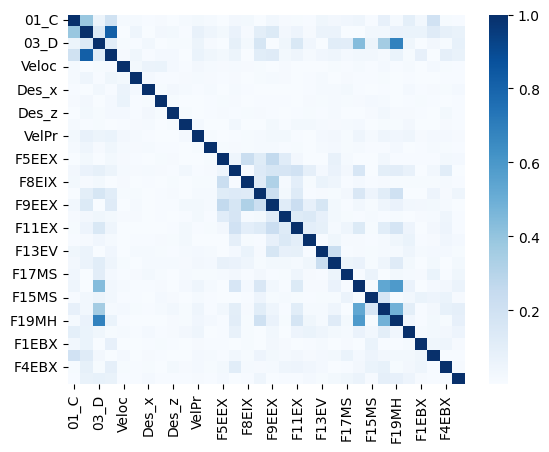

In [612]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Blues')
Heat_Map

### Cansancio

In [613]:
# Separamos los datos cuantitativos
dfCansancio = dfCansancio.select_dtypes(np.number)
dfCansancio

,01_C,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
270,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4375,0.400000,0.6,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.600000
271,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4375,0.400000,0.6,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.704398
272,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,0.444444,0.6,...,0.700000,0.600000,0.800000,0.700000,0.7,0.6,0.7,0.7,0.601941,0.647819
273,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.700000,0.600000,0.734099,0.700000,0.7,0.6,0.7,0.7,0.640668,0.641230
274,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.665757,0.600000,0.835193,0.700000,0.7,0.6,0.7,0.7,0.667443,0.688357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,1,0.4,0.3,0.534149,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.700000,0.622687,0.800000,0.705328,0.7,0.6,0.7,0.7,0.600000,0.593817
24596,1,0.4,0.3,0.538774,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.700000,0.629916,0.800000,0.702665,0.7,0.6,0.7,0.7,0.600000,0.608083
24597,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.700000,0.622235,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.599183
24598,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4000,0.400000,0.6,...,0.700000,0.622909,0.800000,0.700000,0.7,0.6,0.7,0.7,0.600000,0.597855


In [614]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(dfCansancio.corr())
corrTabla

,01_C,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
01_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Veloc,NaN,1.000000,0.040581,0.036574,0.072447,0.064862,7.844860e-04,0.089720,0.013015,0.049285,...,0.027385,0.060642,0.018387,0.119898,0.021922,0.006407,5.763784e-02,0.006032,0.067155,0.006417
Acele,NaN,0.040581,1.000000,0.048591,0.035653,0.015411,7.668952e-04,0.101688,0.018755,0.004637,...,0.004438,0.016602,0.032585,0.050780,0.008968,0.058152,1.041216e-02,0.027454,0.014482,0.007558
Des_x,NaN,0.036574,0.048591,1.000000,0.037328,0.049351,1.962579e-03,0.029752,0.018292,0.131954,...,0.033294,0.137426,0.047060,0.002924,0.029201,0.001504,2.129695e-02,0.055606,0.016289,0.057370
Des_y,NaN,0.072447,0.035653,0.037328,1.000000,0.037622,5.485209e-04,0.060844,0.012224,0.000011,...,0.004736,0.019640,0.021002,0.095978,0.031827,0.034549,2.460772e-02,0.007080,0.011277,0.013815
Des_z,NaN,0.064862,0.015411,0.049351,0.037622,1.000000,2.151015e-03,0.032160,0.022925,0.014144,...,0.002074,0.039815,0.144504,0.146486,0.012128,0.030711,1.440347e-02,0.073199,0.023584,0.030629
Presn,NaN,0.000784,0.000767,0.001963,0.000549,0.002151,1.000000e+00,0.012403,0.090373,0.003174,...,0.038450,0.004561,0.001296,0.002895,0.001826,0.004023,4.908058e-07,0.004285,0.001913,0.001033
VelPr,NaN,0.089720,0.101688,0.029752,0.060844,0.032160,1.240275e-02,1.000000,0.053003,0.008039,...,0.024628,0.025029,0.019649,0.089897,0.009191,0.215718,7.440485e-06,0.064956,0.015394,0.024786
AcePr,NaN,0.013015,0.018755,0.018292,0.012224,0.022925,9.037272e-02,0.053003,1.000000,0.003614,...,0.037485,0.052369,0.012080,0.011098,0.140482,0.025829,4.574456e-06,0.039935,0.115951,0.010591
F5EEX,NaN,0.049285,0.004637,0.131954,0.000011,0.014144,3.174103e-03,0.008039,0.003614,1.000000,...,0.056175,0.007185,0.115148,0.079863,0.016567,0.037772,3.586307e-02,0.010441,0.060884,0.054433


<Axes: >

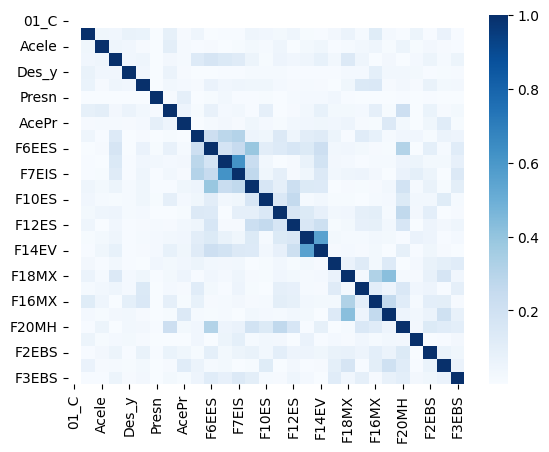

In [615]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Blues')
Heat_Map

### Dolor

In [616]:
# Separamos los datos cuantitativos
dfDolor = dfDolor.select_dtypes(np.number)
dfDolor

,03_D,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
354,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.744244,0.7,0.6,0.6
355,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.648436,0.7,0.6,0.6
356,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
357,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
358,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22832,1,0.468868,0.300000,0.4,0.40039,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22833,1,0.400000,0.300000,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22834,1,0.400000,0.250729,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6
22835,1,0.400000,0.250837,0.4,0.40000,0.2,0.7,0.4,0.4,0.6,...,0.7,0.6,0.8,0.7,0.7,0.6,0.700000,0.7,0.6,0.6


In [617]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(dfDolor.corr())
corrTabla

,03_D,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
03_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Veloc,NaN,1.000000,0.099247,0.032093,0.153384,0.005781,0.002192,0.018733,0.001850,0.001563,...,0.021230,0.103982,0.114218,0.093014,0.034660,NaN,0.007639,0.000185,0.008865,0.042404
Acele,NaN,0.099247,1.000000,0.179706,0.025955,0.007579,0.003869,0.036994,0.012247,0.002759,...,0.017114,0.041272,0.021109,0.053487,0.090453,NaN,0.013482,0.000326,0.015645,0.026866
Des_x,NaN,0.032093,0.179706,1.000000,0.033035,0.005386,0.001259,0.012026,0.005042,0.000898,...,0.015240,0.032371,0.009475,0.033019,0.053371,NaN,0.004386,0.000106,0.005089,0.009215
Des_y,NaN,0.153384,0.025955,0.033035,1.000000,0.027681,0.001213,0.024999,0.005836,0.000865,...,0.000468,0.006840,0.007808,0.013938,0.082863,NaN,0.061341,0.000102,0.004904,0.035259
Des_z,NaN,0.005781,0.007579,0.005386,0.027681,1.000000,0.005686,0.034330,0.003062,0.071533,...,0.011064,0.011522,0.102324,0.019308,0.037111,NaN,0.019812,0.000480,0.022991,0.066861
Presn,NaN,0.002192,0.003869,0.001259,0.001213,0.005686,1.000000,0.002220,0.042843,0.004228,...,0.016087,0.010674,0.010001,0.025430,0.006144,NaN,0.004629,0.000112,0.005372,0.025335
VelPr,NaN,0.018733,0.036994,0.012026,0.024999,0.034330,0.002220,1.000000,0.063975,0.005142,...,0.039204,0.050240,0.095559,0.104315,0.049050,NaN,0.043552,0.031895,0.072393,0.003310
AcePr,NaN,0.001850,0.012247,0.005042,0.005836,0.003062,0.042843,0.063975,1.000000,0.071987,...,0.031577,0.021851,0.008383,0.062068,0.057516,NaN,0.024711,0.006137,0.009983,0.035467
F5EEX,NaN,0.001563,0.002759,0.000898,0.000865,0.071533,0.004228,0.005142,0.071987,1.000000,...,0.067728,0.081711,0.187846,0.011656,0.004035,NaN,0.009101,0.070063,0.113747,0.014484


<Axes: >

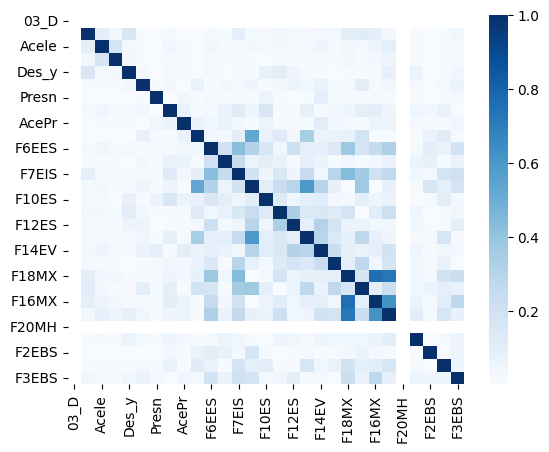

In [618]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Blues')
Heat_Map

## Análisis de Correlaciones

### Regresión Simple y Múltiple (Cansancio)

In [619]:
# 01_C
# Filtrando las correlaciones fuertes
regresionCansancio = abs(df.corr()['01_C'])
regresionCansancio = regresionCansancio[regresionCansancio.abs() > 0.10].sort_values(ascending=False).to_frame()
regresionCansancio

,01_C
01_C,1.000000
02_A,0.388198
04_M,0.198821
F2EBS,0.195211


<Axes: >

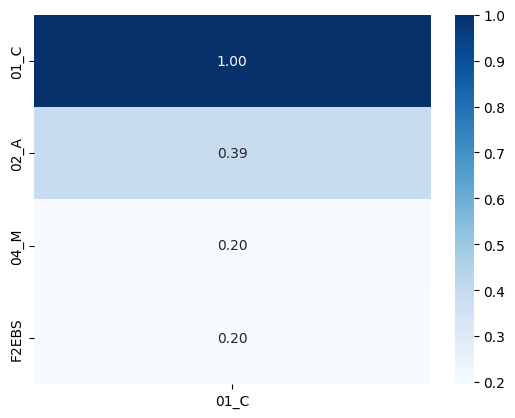

In [620]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(regresionCansancio, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [621]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["02_A"]]
Var_Dep = df[["01_C"]]

model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
# Predecimos los valores de "01_C" a partir de la variable "02_A"
y_pred = model.predict(X = df[["02_A"]])
# Insertamos la columna de preddiciones en el df
df.insert(1, 'Predict01_C', y_pred)
df
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeter = model.score(X = Vars_Indep, y = Var_Dep)
coefDeter # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrel = np.sqrt(coefDeter)
coefCorrel # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

np.float64(0.38819750718496615)

<Axes: xlabel='02_A', ylabel='01_C'>

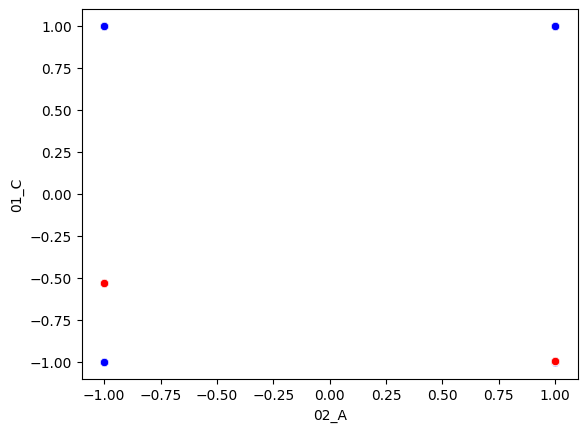

In [622]:
# Gráfica de comparación
sns.scatterplot(x = '02_A', y = '01_C', color = 'blue', data = df)
sns.scatterplot(x = '02_A', y = 'Predict01_C', color = "red", data = df)

In [623]:
# Declaramos las variables dependientes e independientes de la regresión lineal múltiple
Vars_Indep = df[["02_A", "04_M"]]
Var_Dep = df[["01_C"]]

model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
# Predecimos los valores de "01_C" a partir de la variable "02_A"
y_pred = model.predict(X = df[["02_A", "04_M"]])
# Insertamos la columna de preddiciones en el df
df.insert(1, 'PredictMulti01_C', y_pred)
df
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeter1 = model.score(X = Vars_Indep, y = Var_Dep)
coefDeter1 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrel1 = np.sqrt(coefDeter1)
coefCorrel1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

np.float64(0.9773014264842712)

### Regresión Simple y Múltiple (Dolor)

In [624]:
# 03_Dolor
# Filtrando las correlaciones fuertes
regresionDolor = abs(df.corr()['03_D'])
regresionDolor = regresionDolor[regresionDolor.abs() > 0.20].sort_values(ascending=False).to_frame()
regresionDolor

,03_D
03_D,1.000000
F19MH,0.686213
F18MX,0.435094
F16MX,0.356925


<Axes: >

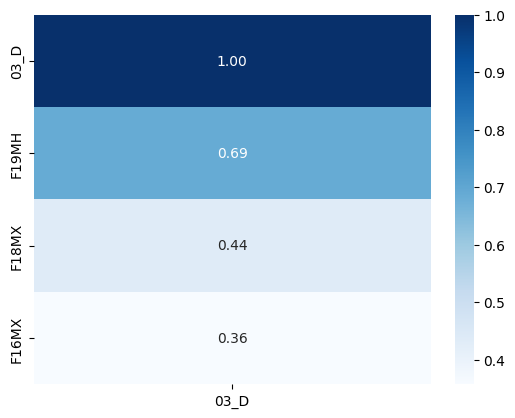

In [625]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(regresionDolor, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

In [626]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["F19MH"]]
Var_Dep = df[["03_D"]]

model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
# Predecimos los valores de "03_D" a partir de la variable "F19MH"
y_pred = model.predict(X = df[["F19MH"]])
# Insertamos la columna de preddiciones en el df
df.insert(1, 'Predict03_D', y_pred)
df
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeter2 = model.score(X = Vars_Indep, y = Var_Dep)
coefDeter2 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrel2 = np.sqrt(coefDeter2)
coefCorrel2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

np.float64(0.6862125475362463)

<Axes: xlabel='F19MH', ylabel='03_D'>

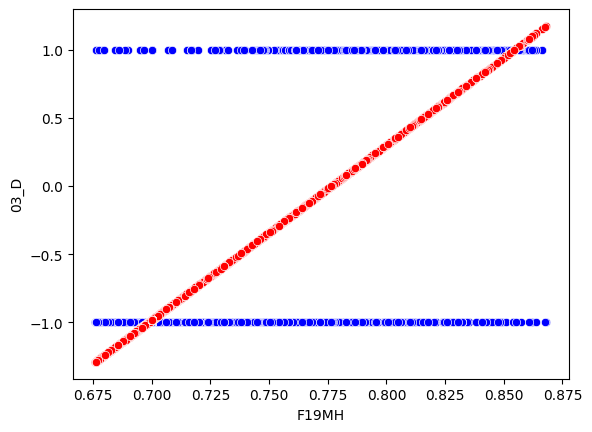

In [627]:
# Gráfica de comparación
sns.scatterplot(x = 'F19MH', y = '03_D', color = 'blue', data = df)
sns.scatterplot(x = 'F19MH', y = 'Predict03_D', color = "red", data = df)

In [628]:
# Declaramos las variables dependientes e independientes de la regresión lineal múltiple
Vars_Indep = df[["F19MH", "F18MX", "F16MX"]]
Var_Dep = df[["03_D"]]

model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
# Predecimos los valores de "01_C" a partir de la variable "02_A"
y_pred = model.predict(X = df[["F19MH", "F18MX", "F16MX"]])
# Insertamos la columna de preddiciones en el df
df.insert(1, 'PredictMulti03_D', y_pred)
df
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeter3 = model.score(X = Vars_Indep, y = Var_Dep)
coefDeter3 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrel3= np.sqrt(coefDeter3)
coefCorrel3# Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

np.float64(0.6875033756124153)

### Regresión No Lineal (Cansancio)

In [629]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['02_A']]
Var_Dep = df['01_C']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros1, covs = curve_fit(func_cuadratica, df["02_A"], df['01_C']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros1

# Predicciones

y_pred1 = func_cuadratica(x,*parametros1) # El * da todas las posiciones
# y_pred1 = func1(x,parametros1[0]) # Obtener solo un valor
# Observamos los valores
y_pred1

# Calculamos el coeficiente de determinación del modelo

R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.3881975071847213)

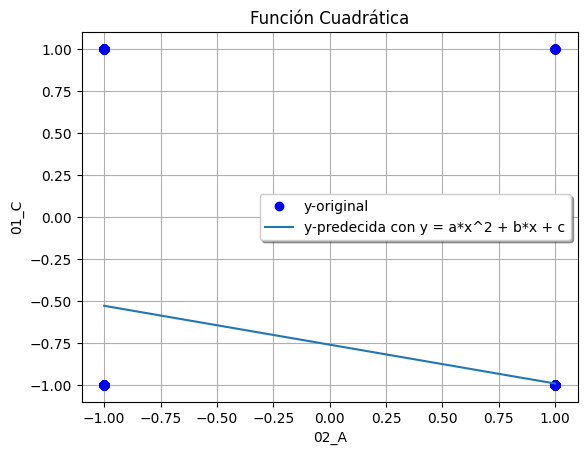

In [630]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred1, label = "y-predecida con y = a*x^2 + b*x + c")
plt.xlabel('02_A')
plt.ylabel('01_C')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [631]:
# Declaramos las variables dependientes e independientes para la regresión no lineal polinomial inversa
Vars_Indep = df[['02_A']]
Var_Dep = df['01_C']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_polinomial_inversa(x, a, b, c):
    return a / b * x**2 + c * x

# Ajustar los parámetros de la función curve_fit

parametros2, covs = curve_fit(func_polinomial_inversa, df["02_A"], df['01_C']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros2

# Predicciones

y_pred2 = func_polinomial_inversa(x,*parametros2) # El * da todas las posiciones

# Observamos los valores
y_pred2

# Calculamos el coeficiente de determinación del modelo

R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2

# Calculamos el coeficiente de correlación del modelo
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(0.3881975069701326)

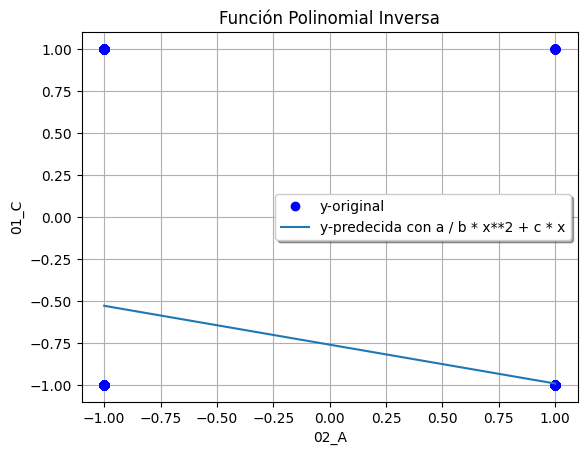

In [632]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred2, label = "y-predecida con a / b * x**2 + c * x")
plt.xlabel('02_A')
plt.ylabel('01_C')
plt.title("Función Polinomial Inversa")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Regresión No Lineal (Dolor)

In [633]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['F19MH']]
Var_Dep = df['03_D']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros3, covs = curve_fit(func_cuadratica, df["F19MH"], df['03_D']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros3

# Predicciones

y_pred3 = func_cuadratica(x,*parametros3) # El * da todas las posiciones
# y_pred3 = func1(x,parametros3[0]) # Obtener solo un valor
# Observamos los valores
y_pred3

# Calculamos el coeficiente de determinación del modelo

R2_Modelo3 = r2_score(y, y_pred3)
R2_Modelo3

# Calculamos el coeficiente de correlación del modelo
R3 = np.sqrt(R2_Modelo3)
R3

np.float64(0.6884301716173852)

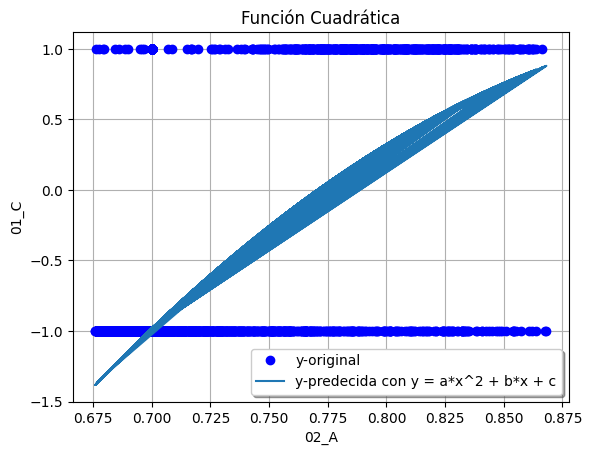

In [634]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred3, label = "y-predecida con y = a*x^2 + b*x + c")
plt.xlabel('02_A')
plt.ylabel('01_C')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [635]:
# Declaramos las variables dependientes e independientes para la regresión no lineal polinomial inversa
Vars_Indep = df[['F19MH']]
Var_Dep = df['03_D']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_polinomial_inversa(x, a, b, c):
  return a / b * x**2 + c * x

# Ajustar los parámetros de la función curve_fit

parametros2, covs = curve_fit(func_polinomial_inversa, df["F19MH"], df['03_D']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros2

# Predicciones

y_pred2 = func_polinomial_inversa(x,*parametros2) # El * da todas las posiciones

# Observamos los valores
y_pred2

# Calculamos el coeficiente de determinación del modelo

R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2

# Calculamos el coeficiente de correlación del modelo
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(0.6827295702037541)

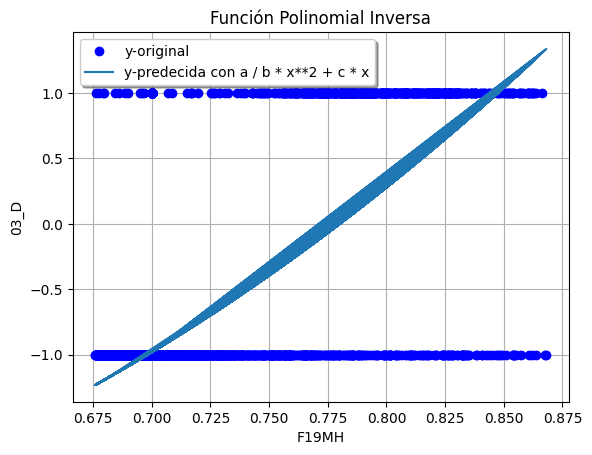

In [636]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred2, label = "y-predecida con a / b * x**2 + c * x")
plt.xlabel('F19MH')
plt.ylabel('03_D')
plt.title("Función Polinomial Inversa")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Regresión Logística (Cansancio)

In [637]:
# Declaramos las variables dependientes e independientes

Vars_Indep = df[['02_A','04_M','F2EBS']]
Var_Dep = df['01_C']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[6697    0]
 [  19  664]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6697
           1       1.00      0.97      0.99       683

    accuracy                           1.00      7380
   macro avg       1.00      0.99      0.99      7380
weighted avg       1.00      1.00      1.00      7380



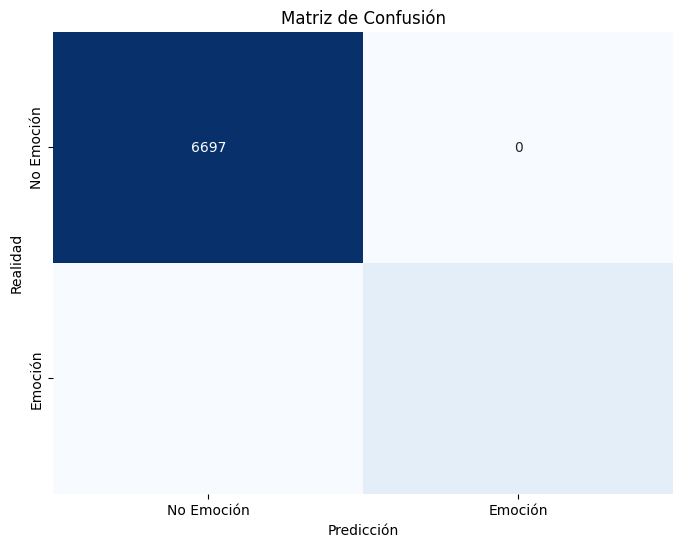

In [640]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["No Emoción", "Emoción"], 
            yticklabels=["No Emoción", "Emoción"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

### Regresión Logística (Dolor)

In [641]:
# Declaramos las variables dependientes e independientes

Vars_Indep = df[["F19MH", "F18MX", "F16MX"]]
Var_Dep = df['03_D']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[7137   24]
 [ 117  102]]

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      7161
           1       0.81      0.47      0.59       219

    accuracy                           0.98      7380
   macro avg       0.90      0.73      0.79      7380
weighted avg       0.98      0.98      0.98      7380



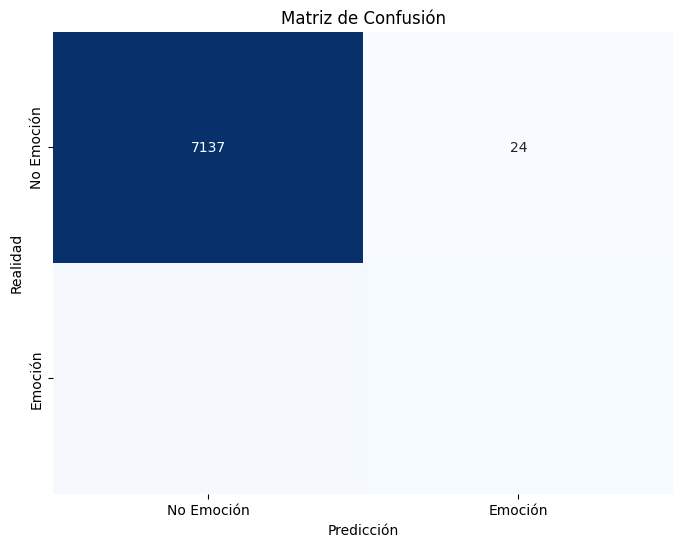

In [642]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["No Emoción", "Emoción"], 
            yticklabels=["No Emoción", "Emoción"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()